# 0. Data Loading and Relational Data Base

## 0.1 Mounting Drive and Imports

Make sure only one team member is running the colab! Please make a copy to save in drive if you plan on making a lot of changes.

In [ ]:
from google.colab import drive
import os

# Check if the mountpoint exists and remove it if it does
if os.path.exists('/content/drive'):
  !rm -rf /content/drive

# Create the mountpoint directory again
os.makedirs('/content/drive', exist_ok=True)

# Now mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/DataEng300Project/Data'

import os

data_path = '/content/drive/MyDrive/DataEng300Project/Data'

output_path_dp03 = f'{data_path}/cleaned_dp03'
output_path_dp04 = f'{data_path}/cleaned_dp04'
output_path_dp02 = f'{data_path}/cleaned_dp02'

os.makedirs(output_path_dp03, exist_ok=True)
os.makedirs(output_path_dp04, exist_ok=True)
os.makedirs(output_path_dp02, exist_ok=True)

In [ ]:
!pip install duckdb
import duckdb


In [ ]:
import pandas as pd

## 0.2 Data Processing

Filtering which columns to keep, then combining all the DP03 datasets (Economic) from each year into one large dataframe.

Processing each CSV file year by year and selecting only the needed columns, then storing as a Parquet file to prevent RAM crashing.


In [ ]:
dp03_columns_to_keep = [
    'NAME',
    'DP03_0002E',  # Civilian labor force (count)
    'DP03_0001E',  # Population (count)
    'DP03_0004E',  # Civilian labor force employed (count)
    'DP03_0005E',  # Civilian labor force unemployed (count)
    'DP03_0062E',  # Median household income (dollars)
    'DP03_0016E',  # Households with children (count)
    'DP03_0019E',  # Drove in personal vehicle to work (count)
    'DP03_0027E',  # Management, business, science, arts occupation (count)
    'DP03_0028E',  # Service occupation (count)
    'DP03_0029E',  # Sales, office occupation (count)
    'DP03_0030E',  # Natural resources, construction, maintenance occupation (count)
    'DP03_0031E'   # Production, transportation, material moving occupation (count)
]

# add more columns if needed

In [ ]:
dp03_years = range(2019, 2024)

for year in dp03_years:
    file_path = f"{data_path}/ACSDP5Y{year}.DP03-Data.csv"
    print(f"Processing DP03 {year}...")

    df = pd.read_csv(
        file_path,
        usecols=dp03_columns_to_keep,
        low_memory=False
    )

    df['zip'] = df['NAME'].str.extract(r'(\d{5})')
    df['year'] = year

    # rename columns if adding more columns above
    df = df.rename(columns={
        'DP03_0002E': 'civilian_labor_force_count',
        'DP03_0001E': 'population_count',
        'DP03_0004E': 'employed_count',
        'DP03_0005E': 'unemployed_count',
        'DP03_0062E': 'median_income_dollars',
        'DP03_0016E': 'households_with_children_count',
        'DP03_0019E': 'commute_drive_alone_to_work_count',
        'DP03_0027E': 'management_business_science_arts_jobs_count',
        'DP03_0028E': 'service_jobs_count',
        'DP03_0029E': 'sales_office_jobs_count',
        'DP03_0030E': 'construction_maintenance_jobs_count',
        'DP03_0031E': 'production_transport_jobs_count'
    })

    df = df.iloc[1:].reset_index(drop=True) # skip the first row

    df.to_parquet(f"{output_path_dp03}/dp03_{year}.parquet", index=False)


Processing DP03 2019...
Processing DP03 2020...
Processing DP03 2021...
Processing DP03 2022...
Processing DP03 2023...


DP04 - Housing Data

In [ ]:
dp04_columns_to_keep = [
    'NAME',
    'DP04_0001E',  # Total housing units (count)
    'DP04_0002E',  # Occupied housing units (count)
    'DP04_0003E',  # Vacant housing units (count)
    'DP04_0004E',  # Homeowner vacancy rate (percent)
    'DP04_0005E',  # Rental vacancy rate (percent)
    'DP04_0017E',  # Housing units built 2020 or later (count)
    'DP04_0018E',  # Housing units built 2010 to 2019 (count)
    'DP04_0019E',  # Housing units built 2000 to 2009 (count)
    'DP04_0020E',  # Housing units built 1990 to 1999 (count)
    'DP04_0021E',  # Housing units built 1980 to 1989 (count)
    'DP04_0022E',  # Housing units built 1970 to 1979 (count)
    'DP04_0023E',  # Housing units built 1960 to 1969 (count)
    'DP04_0024E',  # Housing units built 1950 to 1959 (count)
    'DP04_0025E',  # Housing units built 1940 to 1949 (count)
    'DP04_0026E',  # Housing units built 1939 or earlier (count)
    'DP04_0037E',  # Median number of rooms (count)
    'DP04_0039E',  # Houses with no bedrooom (count)
    'DP04_0040E',  # Houses with 1 bedroom (count)
    'DP04_0041E',  # Houses with 2 bedrooms (count)
    'DP04_0042E',  # Houses with 3 bedrooms (count)
    'DP04_0043E',  # Houses with 4 bedrooms (count)
    'DP04_0044E',  # Houses with 5 or more bedrooms (count)
    'DP04_0089E',  # Median owner-occupied unit value (dollars)
    'DP04_0134E',  # Median gross rent (dollars)
    'DP04_0110E',  # Monthly owner costs (median)
]

# add more columns if needed

In [ ]:
dp04_years = range(2019, 2024)

for year in dp04_years:
    file_path = f"{data_path}/ACSDP5Y{year}.DP04-Data.csv"
    print(f"Processing DP04 {year}...")

    df = pd.read_csv(
        file_path,
        usecols=dp04_columns_to_keep,
        low_memory=False
    )

    df['zip'] = df['NAME'].str.extract(r'(\d{5})')
    df['year'] = year

    df = df.rename(columns={
        'DP04_0001E': 'total_units_count',
        'DP04_0002E': 'occupied_units_count',
        'DP04_0003E': 'vacant_units_count',
        'DP04_0004E': 'homeowner_vacancy_rate_percent',
        'DP04_0005E': 'rental_vacancy_rate_percent',
        'DP04_0017E': 'built_2020_plus_count',
        'DP04_0018E': 'built_2010_2019_count',
        'DP04_0019E': 'built_2000_2009_count',
        'DP04_0020E': 'built_1990_1999_count',
        'DP04_0021E': 'built_1980_1989_count',
        'DP04_0022E': 'built_1970_1979_count',
        'DP04_0023E': 'built_1960_1969_count',
        'DP04_0024E': 'built_1950_1959_count',
        'DP04_0025E': 'built_1940_1949_count',
        'DP04_0026E': 'built_pre_1940_count',
        'DP04_0037E': 'median_rooms_count',
        'DP04_0039E': 'no_bedroom_count',
        'DP04_0040E': 'bedroom_1_count',
        'DP04_0041E': 'bedroom_2_count',
        'DP04_0042E': 'bedroom_3_count',
        'DP04_0043E': 'bedroom_4_count',
        'DP04_0044E': 'bedroom_5_plus_count',
        'DP04_0089E': 'median_home_value_dollars',
        'DP04_0134E': 'median_rent_dollars',
        'DP04_0110E': 'median_owner_cost_dollars'
    })

    df = df.iloc[1:].reset_index(drop=True)
    df.to_parquet(f"{output_path_dp04}/dp04_{year}.parquet", index=False)


Processing DP04 2019...
Processing DP04 2020...
Processing DP04 2021...
Processing DP04 2022...
Processing DP04 2023...


DP02 - Social Characteristics Data

In [ ]:
dp02_columns_to_keep = [
    'NAME',
    'DP02_0001E',  # Total households (count)
    'DP02_0002E',  # Total households with married_couple (count)
    'DP02_0003E',  # Total households with married couple and children (count)
    'DP02_0004E',  # Total cohabiting couple household (count)
    'DP02_0016E',  # Average household size (count)
    'DP02_0017E',  # Average family size (count)
    'DP02_0061E',  # Attended but did not complete highschool (count)
    'DP02_0062E',  # Graduated highschool (count)
    'DP02_0063E',  # Some college, no degree (count)
    'DP02_0064E',  # Associates degree (count)
    'DP02_0065E',  # Bachelors degree (count)
    'DP02_0066E',  # Graduate or professional degree (count)
    'DP02_0070E',  # Civilian veterans (count)
    'DP02_0074E',  # Civilian noninstitutionalized population with a disability (count)
    'DP02_0090E',  # Number of people born in the united states living here (count)
    'DP02_0094E',  # Number of people born in foregin countries living here (count)
    'DP02_0113E',  # Number of people who only speaks english in household (count)
    'DP02_0114E',  # Number of people who speaks another language over english in household (count)
    'DP02_0153PM', # Percent of households with computer
]


In [ ]:
dp02_years = range(2019, 2024)

for year in dp02_years:
    file_path = f"{data_path}/ACSDP5Y{year}.DP02-Data.csv"
    print(f"Processing DP02 {year}...")

    df = pd.read_csv(
        file_path,
        usecols=dp02_columns_to_keep,
        low_memory=False
    )

    df['zip'] = df['NAME'].str.extract(r'(\d{5})')
    df['year'] = year

    df = df.rename(columns={
        'DP02_0001E': 'total_households_count',
        'DP02_0002E': 'married_couple_households_count',
        'DP02_0003E': 'married_with_children_count',
        'DP02_0004E': 'cohabiting_couple_count',
        'DP02_0016E': 'avg_household_size_count',
        'DP02_0017E': 'avg_family_size_count',
        'DP02_0061E': 'some_hs_no_diploma_count',
        'DP02_0062E': 'hs_grad_count',
        'DP02_0063E': 'some_college_no_degree_count',
        'DP02_0064E': 'associate_degree_count',
        'DP02_0065E': 'bachelor_degree_count',
        'DP02_0066E': 'grad_prof_degree_count',
        'DP02_0070E': 'veterans_count',
        'DP02_0074E': 'disabled_pop_count',
        'DP02_0090E': 'us_born_count',
        'DP02_0094E': 'foreign_born_count',
        'DP02_0113E': 'english_only_count',
        'DP02_0114E': 'non_english_count',
        'DP02_0153PM': 'computer_access_percent',
    })

    df = df.iloc[1:].reset_index(drop=True)
    df.to_parquet(f"{output_path_dp02}/dp02_{year}.parquet", index=False)


Processing DP02 2019...
Processing DP02 2020...
Processing DP02 2021...
Processing DP02 2022...
Processing DP02 2023...


## 0.3 Duckdb

In [ ]:
con = duckdb.connect()

# Load economic data
con.sql(f"""
    CREATE OR REPLACE TABLE economic_data AS
    SELECT * FROM read_parquet('{data_path}/cleaned_dp03/dp03_*.parquet')
""")

# Load housing data
con.sql(f"""
    CREATE OR REPLACE TABLE housing_data AS
    SELECT * FROM read_parquet('{data_path}/cleaned_dp04/dp04_*.parquet')
""")

# Load social characteristics data
con.sql(f"""
    CREATE OR REPLACE TABLE social_data AS
    SELECT * FROM read_parquet('{data_path}/cleaned_dp02/dp02_*.parquet')
""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
con.sql("SELECT * FROM economic_data LIMIT 5").df()

,NAME,population_count,civilian_labor_force_count,employed_count,unemployed_count,households_with_children_count,commute_drive_alone_to_work_count,management_business_science_arts_jobs_count,service_jobs_count,sales_office_jobs_count,construction_maintenance_jobs_count,production_transport_jobs_count,median_income_dollars,zip,year
0,ZCTA5 00601,14003,5625,3657,1968,2570,3031,1123,1010,570,434,520,14361,00601,2019
1,ZCTA5 00602,31726,12608,11188,1420,4737,7767,2913,2810,2529,1279,1657,16807,00602,2019
2,ZCTA5 00603,39163,15332,12004,3197,6235,10231,3744,2713,3067,1019,1461,16049,00603,2019
3,ZCTA5 00606,5417,1407,1238,169,746,1085,120,291,220,368,239,12119,00606,2019
4,ZCTA5 00610,22489,9286,8257,1029,3469,6082,1805,1899,1953,833,1767,19898,00610,2019


In [ ]:
con.sql("SELECT * FROM housing_data LIMIT 5").df()

,NAME,total_units_count,occupied_units_count,vacant_units_count,homeowner_vacancy_rate_percent,rental_vacancy_rate_percent,built_2020_plus_count,built_2010_2019_count,built_2000_2009_count,built_1990_1999_count,...,bedroom_1_count,bedroom_2_count,bedroom_3_count,bedroom_4_count,bedroom_5_plus_count,median_home_value_dollars,median_owner_cost_dollars,median_rent_dollars,zip,year
0,ZCTA5 00601,7250,5509,1741,0.4,2.0,96,82,738,1247,...,210,1711,4125,1011,138,83900,578,383,00601,2019
1,ZCTA5 00602,17538,12740,4798,0.9,10.8,0,132,1392,2385,...,462,4818,10210,1488,214,85300,1964,400,00602,2019
2,ZCTA5 00603,24322,19228,5094,1.8,4.4,15,207,3931,3492,...,1187,6059,13039,2939,637,118400,3306,433,00603,2019
3,ZCTA5 00606,2783,1946,837,5.1,1.4,10,26,275,603,...,147,976,1246,384,8,80800,143,275,00606,2019
4,ZCTA5 00610,12455,8795,3660,1.9,14.4,12,18,1433,1881,...,368,2836,7873,1111,65,87600,1814,427,00610,2019


First 131 rows of the social_data for all years are missing.

In [ ]:
con.sql("SELECT * FROM social_data LIMIT 132").df()

,NAME,total_households_count,married_couple_households_count,married_with_children_count,cohabiting_couple_count,avg_household_size_count,avg_family_size_count,some_hs_no_diploma_count,hs_grad_count,some_college_no_degree_count,...,grad_prof_degree_count,veterans_count,disabled_pop_count,us_born_count,foreign_born_count,english_only_count,non_english_count,computer_access_percent,zip,year
0,ZCTA5 00601,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,00601,2019
1,ZCTA5 00602,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,00602,2019
2,ZCTA5 00603,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,00603,2019
3,ZCTA5 00606,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,00606,2019
4,ZCTA5 00610,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,00610,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,ZCTA5 00982,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,00982,2019
128,ZCTA5 00983,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,00983,2019
129,ZCTA5 00985,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,00985,2019
130,ZCTA5 00987,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,00987,2019


## 0.4 Joining Tables

In [ ]:
joined_df = con.sql("""
    SELECT *
    FROM economic_data e
    JOIN housing_data h ON e.zip = h.zip AND e.year = h.year
    JOIN social_data s ON e.zip = s.zip AND e.year = s.year
""").df()


In [ ]:
# Drop duplicate zip and year columns
joined_df = joined_df.drop(columns=['zip_1', 'year_1', 'zip_2', 'year_2'], errors='ignore')


In [ ]:
# number of data or zipcodes = 167,560
len(joined_df)

167560

## 0.5 Data Exploration + Cleaning

how many rows with null values? Distribution of null values amongst columns. Anything interesting about the data?

In [ ]:
joined_df.isnull().sum().sort_values(ascending=False)

,0
some_hs_no_diploma_count,658
hs_grad_count,658
some_college_no_degree_count,658
associate_degree_count,658
bachelor_degree_count,658
...,...
bedroom_1_count,0
built_1940_1949_count,0
bedroom_2_count,0
bedroom_3_count,0


In [ ]:
# drop missing values
joined_df = joined_df.dropna()

In [ ]:
# number of data or zipcodes = 167,560
len(joined_df)

166902

# 1. Goal 1

# 1. Goal 1

## 1.1 Data Preparation for Cost Burden Ratio

For Goal 1, we aim to analyze housing affordability across ZIP codes and years.

We will calculate a **cost burden ratio**, defined as:

**Cost Burden Ratio** = (Median Monthly Rent * 12) / Median Household Income

We will also compute an **unemployment rate** as a supporting economic indicator:

**Unemployment Rate (%)** = (Unemployed Count / Civilian Labor Force Count) * 100

We will visualize the distribution of cost burden ratios, correlations with unemployment, and identify outlier ZIP codes.


In [ ]:
import pandas as pd
goal1_df = joined_df.copy()

cols_to_convert = [           #List of columns needed for Goal 1
    "median_rent_dollars",
    "median_income_dollars",
    "unemployed_count",
    "civilian_labor_force_count"
]

for col in cols_to_convert:
    goal1_df[col] = pd.to_numeric(goal1_df[col], errors='coerce')

#Computing the unemployment rate
goal1_df['unemployment_rate_percent'] = (goal1_df['unemployed_count'] / goal1_df['civilian_labor_force_count']) * 100
#Computing the annual housing cost
goal1_df['annual_housing_cost'] = goal1_df['median_rent_dollars'] * 12
#Computing the cost burden ratio
goal1_df['cost_burden_ratio'] = goal1_df['annual_housing_cost'] / goal1_df['median_income_dollars']

#Handling missing values by median imputation
goal1_df['cost_burden_ratio'] = goal1_df['cost_burden_ratio'].fillna(goal1_df['cost_burden_ratio'].median())
goal1_df['unemployment_rate_percent'] = goal1_df['unemployment_rate_percent'].fillna(goal1_df['unemployment_rate_percent'].median())

goal1_df[['year', 'zip', 'median_rent_dollars', 'median_income_dollars', 'cost_burden_ratio', 'unemployment_rate_percent']].head()


,year,zip,median_rent_dollars,median_income_dollars,cost_burden_ratio,unemployment_rate_percent
0,2022,64788,784.0,72100.0,0.130485,3.110048
1,2022,64790,756.0,41202.0,0.220183,4.250000
2,2022,64801,873.0,51503.0,0.203406,4.401427
3,2022,64804,865.0,59563.0,0.174269,3.677278
4,2022,64830,888.0,57500.0,0.185322,0.943396


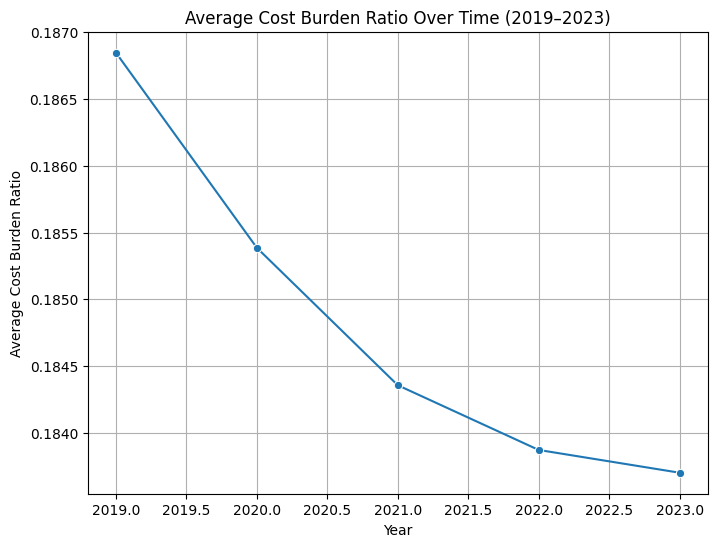

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Graph 1
#Average cost burden ratio per year - to track how average housing affordability changes over time (years) across all zip codes
avg_burden_per_year = goal1_df.groupby('year')['cost_burden_ratio'].mean().reset_index()

#Lineplot
plt.figure(figsize=(8, 6))
sns.lineplot(data=avg_burden_per_year, x='year', y='cost_burden_ratio', marker='o')
plt.title('Average Cost Burden Ratio Over Time (2019–2023)')
plt.ylabel('Average Cost Burden Ratio')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [ ]:
#Graph 2
#Sorting zipcodes by cost burden ratio - identifying areas where housing costs are disproportionately high or low
#Top 10 least affordable Zipcodes
top_10 = goal1_df.sort_values('cost_burden_ratio', ascending=False).head(10)

#Top 10 most affordable Zipcodes
bottom_10 = goal1_df.sort_values('cost_burden_ratio', ascending=True).head(10)

print("Top 10 Least Affordable Zipcodes (Highest Cost Burden Ratio):")
display(top_10[['year', 'zip', 'cost_burden_ratio', 'median_income_dollars', 'median_rent_dollars', 'unemployment_rate_percent']])

print("\nTop 10 Most Affordable Zipcodes (Lowest Cost Burden Ratio):")
display(bottom_10[['year', 'zip', 'cost_burden_ratio', 'median_income_dollars', 'median_rent_dollars', 'unemployment_rate_percent']])


Top 10 Least Affordable Zipcodes (Highest Cost Burden Ratio):


,year,zip,cost_burden_ratio,median_income_dollars,median_rent_dollars,unemployment_rate_percent
62569,2019,53706,1.353943,10804.0,1219.0,9.568026
122977,2021,36688,1.237285,5761.0,594.0,5.697151
127052,2021,48109,1.207997,11404.0,1148.0,4.463209
160826,2022,48109,1.200175,13708.0,1371.0,5.723077
95689,2020,53706,1.136571,11635.0,1102.0,10.610932
127939,2021,49921,1.086213,17422.0,1577.0,0.000000
94779,2020,50521,1.084017,9022.0,815.0,0.000000
34051,2023,65664,1.063086,14821.0,1313.0,29.411765
155425,2022,32603,1.059097,12894.0,1138.0,9.900259
134065,2021,65664,1.040556,11071.0,960.0,0.000000



Top 10 Most Affordable Zipcodes (Lowest Cost Burden Ratio):


,year,zip,cost_burden_ratio,median_income_dollars,median_rent_dollars,unemployment_rate_percent
64755,2019,59025,0.019170,80750.0,129.0,0.000000
5432,2022,79789,0.019629,111875.0,183.0,0.000000
164528,2022,57331,0.020956,102500.0,179.0,0.000000
130754,2021,57331,0.023825,91667.0,182.0,0.000000
42325,2023,93517,0.027305,98882.0,225.0,0.000000
5908,2022,81236,0.029117,91082.0,221.0,5.699482
82458,2020,15622,0.029465,93669.0,230.0,15.578635
97252,2020,57331,0.029485,74479.0,183.0,0.000000
31327,2023,58783,0.031456,125509.0,329.0,3.017241
166605,2022,62459,0.032821,73125.0,200.0,3.521127


In [ ]:
#Graph 3
#Tracking which zipcodes stay in the top 10 for more than a year
#For each year, calculating the top 10 zips
top10_per_year = {}

years_to_track = [2019, 2020, 2021, 2022, 2023]

for year in years_to_track:
    top10_zips = goal1_df[goal1_df['year'] == year] \
                    .sort_values('cost_burden_ratio', ascending=False) \
                    .head(10)['zip'].tolist()
    top10_per_year[year] = top10_zips

#Creating a matrix with zips from all 5 years
all_top10_zips = set(zip for zips in top10_per_year.values() for zip in zips)

zip_tracking_df = pd.DataFrame(index=sorted(all_top10_zips), columns=years_to_track)

#Finding which zips were in the top 10 in all the years
for year in years_to_track:
    for zip_code in zip_tracking_df.index:
        zip_tracking_df.loc[zip_code, year] = 1 if zip_code in top10_per_year[year] else 0

zip_tracking_df['Total_Years_in_Top10'] = zip_tracking_df.sum(axis=1)

#Finding which zips were in the top 10 for more than a year
persistent_zips = zip_tracking_df[zip_tracking_df['Total_Years_in_Top10'] > 1]

print("Zipcodes that stayed in the top 10 for more than a year")
display(persistent_zips.sort_values('Total_Years_in_Top10', ascending=False))

Zipcodes that stayed in the top 10 for more than a year


,2019,2020,2021,2022,2023,Total_Years_in_Top10
49921,0,1,1,1,0,3
64147,1,1,1,0,0,3
65664,0,0,1,1,1,3
32603,0,0,0,1,1,2
36688,0,0,1,1,0,2
48109,0,0,1,1,0,2
53706,1,1,0,0,0,2
75247,0,0,0,1,1,2
78705,1,1,0,0,0,2
86011,0,0,1,1,0,2


In [ ]:
#Checking how many missing per column to see whether more imputation is needed
joined_df.isnull().sum().sort_values(ascending=False)


,0
NAME,0
population_count,0
civilian_labor_force_count,0
employed_count,0
unemployed_count,0
...,...
us_born_count,0
foreign_born_count,0
english_only_count,0
non_english_count,0


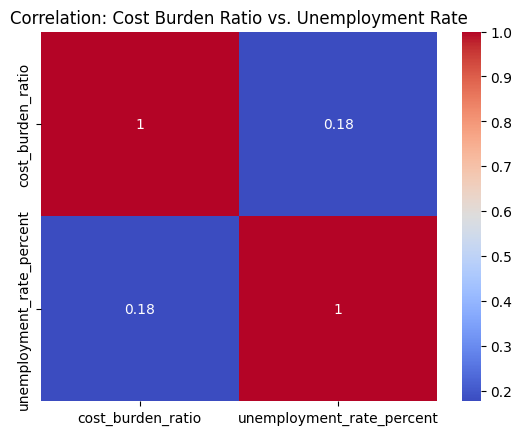

In [ ]:
#Graph 4 - to check whether unemployment is an important factor in housing affordability disparities
#Correlation with Unemployment Rate - calculates the correlation coefficient between the percentage of income spent on housing and the percentage of people unemployed

corr = goal1_df[['cost_burden_ratio', 'unemployment_rate_percent']].corr()

#Plotting a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation: Cost Burden Ratio vs. Unemployment Rate')
plt.show()

In [ ]:
!pip install geopandas
!pip install shapely

In [ ]:
import geopandas as gpd
zip_gdf = gpd.read_file("https://raw.githubusercontent.com/ndrezn/zip-code-geojson/main/usa_zip_codes_geo_100m.json")
zip_gdf.head()


,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,09,06810,0906810,B5,G6350,S,53579379,702851,+41.3742839,-073.4576107,N,"POLYGON ((-73.41192 41.42953, -73.41531 41.424..."
1,09,06608,0906608,B5,G6350,S,2675495,340160,+41.1864746,-073.1812508,N,"POLYGON ((-73.17089 41.18665, -73.17163 41.188..."
2,09,06820,0906820,B5,G6350,S,32777323,5998611,+41.0762020,-073.4800804,N,"POLYGON ((-73.47456 41.1147, -73.47903 41.1146..."
3,09,06830,0906830,B5,G6350,S,35062121,12544046,+41.0376046,-073.6243391,N,"POLYGON ((-73.59916 41.09902, -73.60561 41.096..."
4,09,06902,0906902,B5,G6350,S,26362119,6129760,+41.0593528,-073.5443374,N,"POLYGON ((-73.54197 41.05886, -73.54305 41.062..."


In [ ]:
goal1_df['zip_str'] = goal1_df['zip'].astype(str).str.zfill(5)

In [ ]:
merged_gdf = zip_gdf.merge(
    goal1_df,
    left_on='ZCTA5CE10',   # this is the ZIP code column in this GeoJSON
    right_on='zip_str',
    how='inner'
)
print(f"Merged with {len(merged_gdf)} ZIP codes")
merged_gdf.head()

Merged with 164870 ZIP codes


,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,disabled_pop_count,us_born_count,foreign_born_count,english_only_count,non_english_count,computer_access_percent,unemployment_rate_percent,annual_housing_cost,cost_burden_ratio,zip_str
0,09,06810,0906810,B5,G6350,S,53579379,702851,+41.3742839,-073.4576107,...,717,31075,22662,25281,27208,2.5,7.034796,21792.0,0.293010,06810
1,09,06810,0906810,B5,G6350,S,53579379,702851,+41.3742839,-073.4576107,...,382,19535,19569,25576,13735,2.1,6.773624,17592.0,0.277306,06810
2,09,06810,0906810,B5,G6350,S,53579379,702851,+41.3742839,-073.4576107,...,464,32077,19523,24353,24580,2.7,6.644529,17592.0,0.275676,06810
3,09,06810,0906810,B5,G6350,S,53579379,702851,+41.3742839,-073.4576107,...,469,32354,20442,25420,25637,2.5,6.803370,18816.0,0.288895,06810
4,09,06810,0906810,B5,G6350,S,53579379,702851,+41.3742839,-073.4576107,...,646,31921,21329,25195,26495,2.2,6.534510,20916.0,0.292049,06810


<ipython-input-33-5e5136b7870a>:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


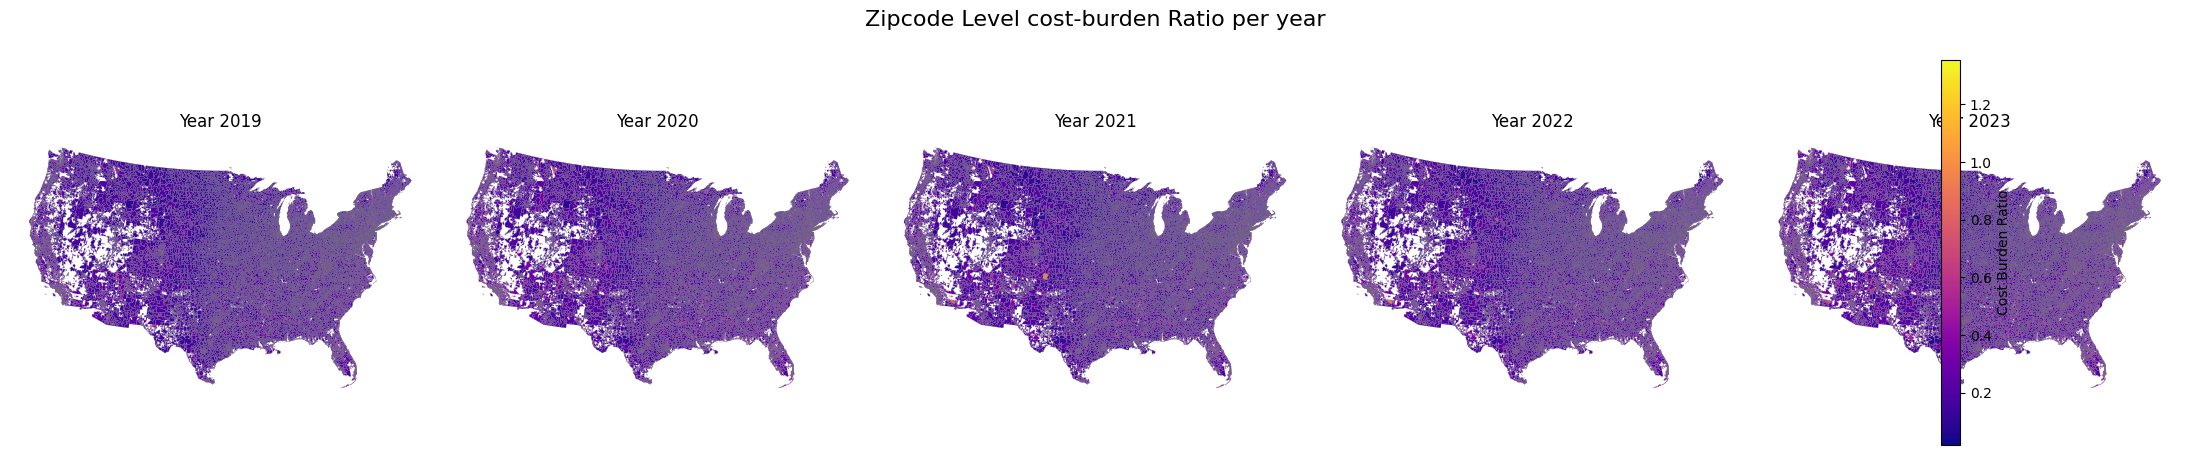

Threshold for Top 5% ZIPs: 0.286
Number of ZIPs in Top 5%: 8161


<ipython-input-33-5e5136b7870a>:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


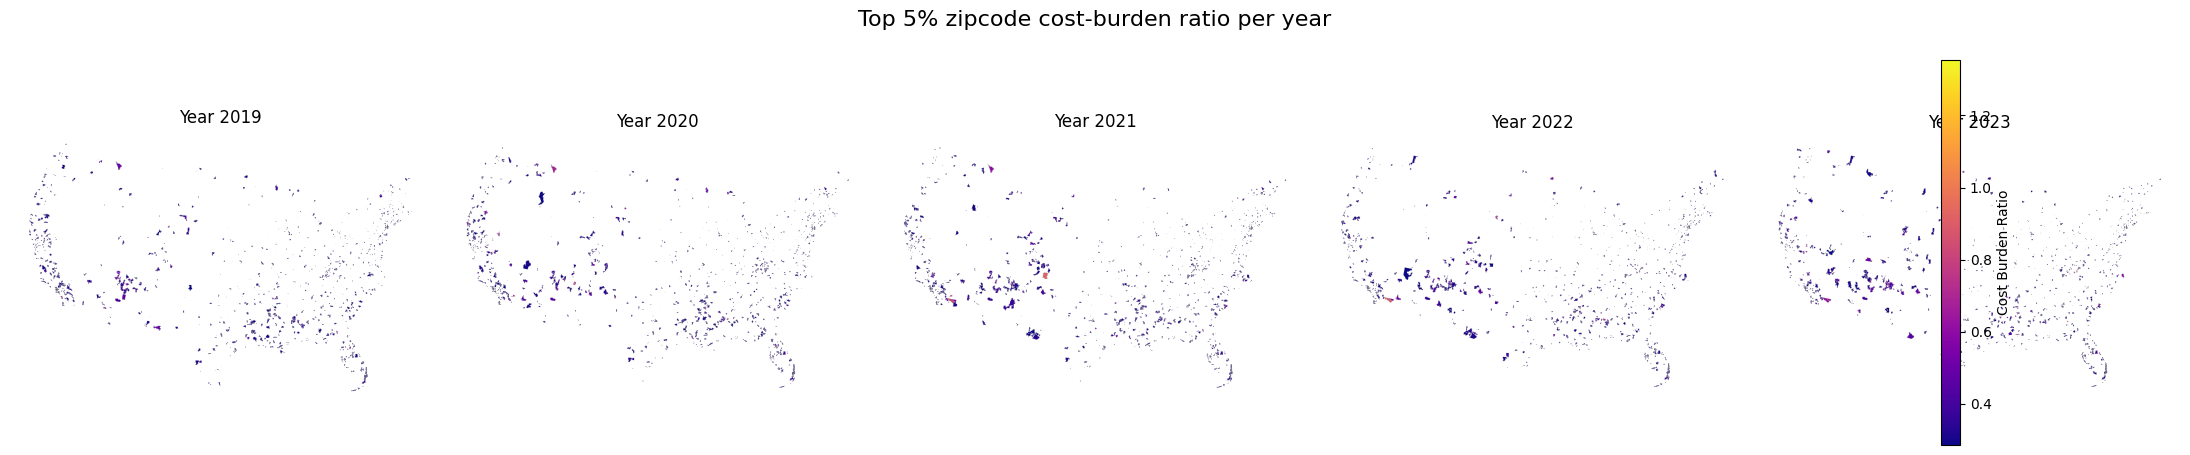

In [ ]:
#Graph 5 - checking if housing affordability changes over time across the country by zip
#Are certain regions getting more or less affordable?
import matplotlib.pyplot as plt
import geopandas as gpd

merged_gdf['zip_prefix'] = merged_gdf['ZCTA5CE10'].str[:3]
excluded_prefixes = ['995', '996', '997', '998', '999',   # Alaska
                     '967', '968',                       # Hawaii
                     '006', '007', '008', '009']         # Puerto Rico

merged_gdf_filtered = merged_gdf[~merged_gdf['zip_prefix'].isin(excluded_prefixes)]
merged_gdf_filtered = merged_gdf_filtered.to_crs(epsg=5070)
years_to_plot = [2019, 2020, 2021, 2022, 2023]
fig, axes = plt.subplots(1, len(years_to_plot), figsize=(22, 5))

for i, year in enumerate(years_to_plot):
    gdf_year = merged_gdf_filtered[merged_gdf_filtered['year'] == year] #Filter for that year
    gdf_year.plot(
        column='cost_burden_ratio',
        cmap='plasma',
        linewidth=0.1,
        ax=axes[i],
        edgecolor='gray',
        legend=False  # We'll add one legend outside
    )
    axes[i].set_title(f'Year {year}', fontsize=12)
    axes[i].axis('off')

sm = plt.cm.ScalarMappable(cmap='plasma',
                           norm=plt.Normalize(vmin=merged_gdf_filtered['cost_burden_ratio'].min(),
                                              vmax=merged_gdf_filtered['cost_burden_ratio'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.01)
cbar.set_label('Cost Burden Ratio')
plt.suptitle('Zipcode Level cost-burden Ratio per year', fontsize=16)
plt.tight_layout()
plt.show()

#Graph 6
#Looking at only the top 5% of most burdened zipcodes by year to identify persistent hotspots of housing disparities
threshold = merged_gdf_filtered['cost_burden_ratio'].quantile(0.95)
merged_gdf_top5 = merged_gdf_filtered[merged_gdf_filtered['cost_burden_ratio'] >= threshold]

print(f"Threshold for Top 5% ZIPs: {threshold:.3f}")
print(f"Number of ZIPs in Top 5%: {len(merged_gdf_top5)}")

years_to_plot = [2019, 2020, 2021, 2022, 2023]
fig, axes = plt.subplots(1, len(years_to_plot), figsize=(22, 5))

for i, year in enumerate(years_to_plot):
    gdf_year = merged_gdf_top5[merged_gdf_top5['year'] == year]

    gdf_year.plot(
        column='cost_burden_ratio',
        cmap='plasma',
        linewidth=0.1,
        ax=axes[i],
        edgecolor='gray',
        legend=False
    )

    axes[i].set_title(f'Year {year}', fontsize=12)
    axes[i].axis('off')

vmin = merged_gdf_top5['cost_burden_ratio'].min()
vmax = merged_gdf_top5['cost_burden_ratio'].max()

sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.01)
cbar.set_label('Cost Burden Ratio')

plt.suptitle('Top 5% zipcode cost-burden ratio per year', fontsize=16)
plt.tight_layout()
plt.show()

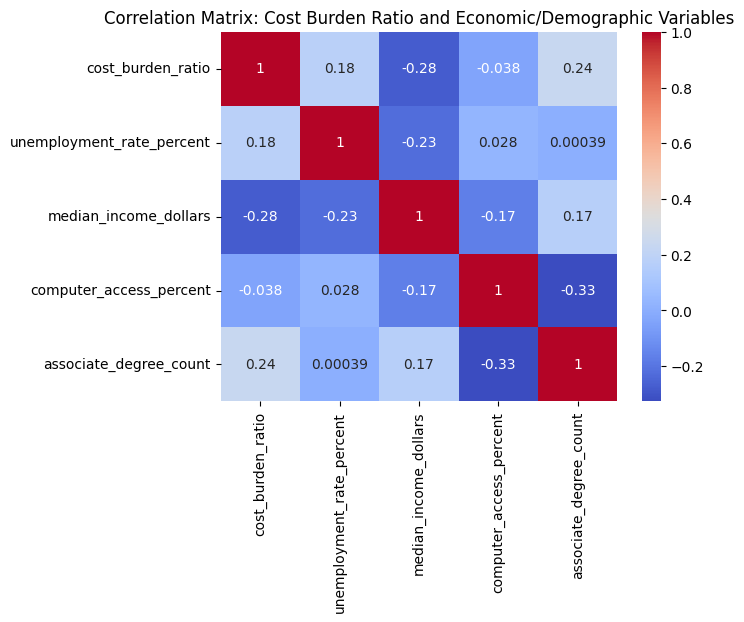

In [ ]:
#Graph 7 - checking which economic and social factors can affect affordability

corr_vars = [
    'cost_burden_ratio',
    'unemployment_rate_percent',
    'median_income_dollars',
    'computer_access_percent',
    'associate_degree_count'
    ]

for col in corr_vars:
    goal1_df[col] = pd.to_numeric(goal1_df[col], errors='coerce')

#Computing the correlation matrix
corr_matrix = goal1_df[corr_vars].corr()
#Plotting a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Cost Burden Ratio and Economic/Demographic Variables')
plt.show()

In [ ]:
#Graph 8 - checking how the most unaffordable zipcodes relate to the normal zipcodes in terms of income, unemployment, and access
#Defining the top outliers (highest cost burden)
top_outliers = goal1_df[goal1_df['cost_burden_ratio'] > goal1_df['cost_burden_ratio'].quantile(0.95)]

#Defining the normal zipcodes (middle 50%)
middle_zip = goal1_df[(goal1_df['cost_burden_ratio'] >= goal1_df['cost_burden_ratio'].quantile(0.25)) &
                      (goal1_df['cost_burden_ratio'] <= goal1_df['cost_burden_ratio'].quantile(0.75))]

#Comparing average variables
compare_df = pd.DataFrame({
    'Top 5% Outliers': top_outliers[['unemployment_rate_percent', 'median_income_dollars', 'computer_access_percent']].mean(),
    'Middle 50% ZIPs': middle_zip[['unemployment_rate_percent', 'median_income_dollars', 'computer_access_percent']].mean()
})

display(compare_df)

,Top 5% Outliers,Middle 50% ZIPs
unemployment_rate_percent,8.425648,5.169118
median_income_dollars,44866.453271,68520.477574
computer_access_percent,6.110208,13.742446


# 3. Goal 3

## 3.1 Data Exploration + Preparation + Cleaning for goal 3

In [ ]:
# Make a copy
goal3_df = joined_df.copy()

In [ ]:
# List columns and column type
column_info = pd.DataFrame({
    'Column': goal3_df.columns,
    'Data Type': goal3_df.dtypes.values
})

column_info

,Column,Data Type
0,NAME,object
1,population_count,object
2,civilian_labor_force_count,object
3,employed_count,object
4,unemployed_count,object
...,...,...
56,us_born_count,object
57,foreign_born_count,object
58,english_only_count,object
59,non_english_count,object


In [ ]:
import pandas as pd

# List of columns that need to be numeric
cols_to_convert = [
    "population_count",
    "median_rent_dollars",
    # By Income Level
    "median_income_dollars",
    # By Education Level
    "some_hs_no_diploma_count",
    "hs_grad_count",
    "some_college_no_degree_count",
    "associate_degree_count",
    "bachelor_degree_count",
    "grad_prof_degree_count",
    # By Employment Status
    "employed_count",
    "unemployed_count",
    # By Nativity
    "us_born_count",
    "foreign_born_count",
    # By Language
    "english_only_count",
    "non_english_count",
    # By Disability Status
    "disabled_pop_count",
    # By Veteran Status
    "veterans_count",
]

# Convert each column to numeric (errors='coerce' will convert bad values to NaN)
for col in cols_to_convert:
    goal3_df[col] = pd.to_numeric(goal3_df[col], errors='coerce')

In [ ]:
len(goal3_df)

166902

## 3.2 Average Rent-to-Income Ratio by Demographic Category


### 3.2.0 Load Libraries + Helper Functions

In [ ]:
# Load Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Helper Function
def compute_group_rent_income_ratio(con, df_name, group_dict, group_label):
    results = []

    for label, col in group_dict.items():
        query = f"""
        SELECT
            SUM(CASE
                    WHEN median_income_dollars > 0 THEN (median_rent_dollars * 12 / median_income_dollars) * {col}
                    ELSE 0
                END) / NULLIF(SUM({col}), 0) AS rent_income_ratio
        FROM {df_name}
        WHERE median_income_dollars IS NOT NULL
            AND median_rent_dollars IS NOT NULL
            AND {col} IS NOT NULL
        """
        df = con.sql(query).df()
        rent_income_ratio = df.loc[0, 'rent_income_ratio']
        results.append({group_label: label, 'Rent to Income Ratio': rent_income_ratio})

    return pd.DataFrame(results)

# Plot Function
def plot_rent_income_ratios(df, x_col, title):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x=x_col, y='Rent to Income Ratio')
    plt.title(title)
    plt.ylabel('Rent to Income Ratio')
    plt.xlabel(x_col)
    plt.xticks(rotation=45)
    plt.ylim(0, max(df['Rent to Income Ratio'].max() * 1.1, 0.35))
    plt.grid(axis='y')

    # Add burden threshold line at 0.3 (30%)
    plt.axhline(0.3, color='red', linestyle='--', linewidth=2, label='Rent Burden Threshold (30%)')
    plt.legend()

    # Add text labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., # x-position
            height + 0.01,                  # y-position slightly above the bar
            f'{height:.2f}',                # formatted ratio
            ha='center', va='bottom', fontsize=10, color='black'
        )

    plt.tight_layout()
    plt.show()

### 3.2.1 Income Level

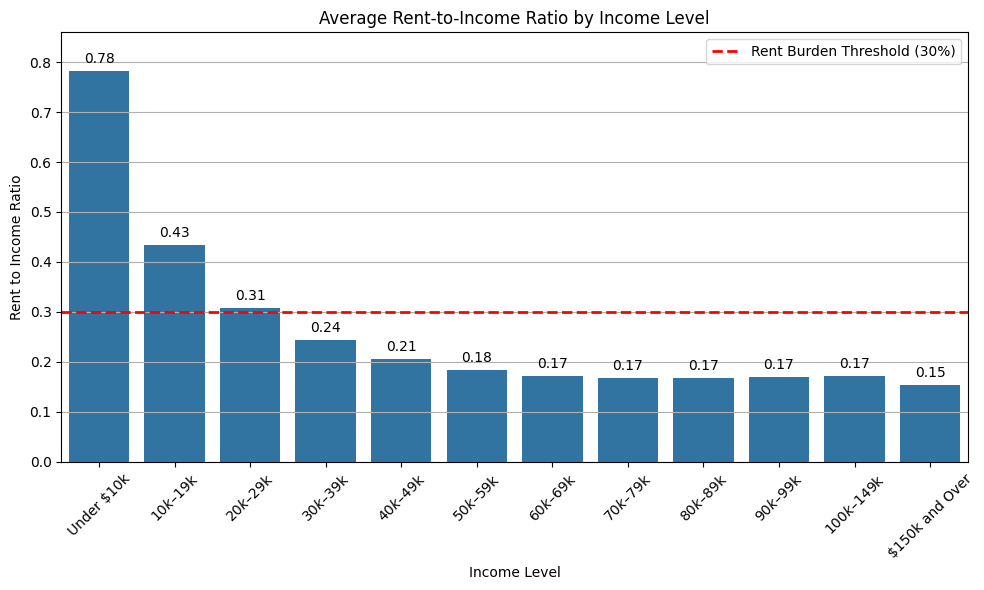

In [ ]:
query = """
WITH income_brackets AS (
  SELECT
    CASE
      WHEN median_income_dollars < 10000 THEN 'Under $10k'
      WHEN median_income_dollars BETWEEN 10000 AND 19999 THEN '$10k–$19k'
      WHEN median_income_dollars BETWEEN 20000 AND 29999 THEN '$20k–$29k'
      WHEN median_income_dollars BETWEEN 30000 AND 39999 THEN '$30k–$39k'
      WHEN median_income_dollars BETWEEN 40000 AND 49999 THEN '$40k–$49k'
      WHEN median_income_dollars BETWEEN 50000 AND 59999 THEN '$50k–$59k'
      WHEN median_income_dollars BETWEEN 60000 AND 69999 THEN '$60k–$69k'
      WHEN median_income_dollars BETWEEN 70000 AND 79999 THEN '$70k–$79k'
      WHEN median_income_dollars BETWEEN 80000 AND 89999 THEN '$80k–$89k'
      WHEN median_income_dollars BETWEEN 90000 AND 99999 THEN '$90k–$99k'
      WHEN median_income_dollars BETWEEN 100000 AND 149999 THEN '$100k–$149k'
      ELSE '$150k and Over'
    END AS income_bracket,
    (median_rent_dollars * 12.0 / median_income_dollars) AS rent_income_ratio
  FROM goal3_df
  WHERE median_income_dollars IS NOT NULL
    AND median_rent_dollars IS NOT NULL
    AND median_income_dollars > 0
)
SELECT
  income_bracket,
  AVG(rent_income_ratio) AS avg_rent_income_ratio
FROM income_brackets
GROUP BY income_bracket
ORDER BY
  CASE income_bracket
    WHEN 'Under $10k' THEN 1
    WHEN '$10k–$19k' THEN 2
    WHEN '$20k–$29k' THEN 3
    WHEN '$30k–$39k' THEN 4
    WHEN '$40k–$49k' THEN 5
    WHEN '$50k–$59k' THEN 6
    WHEN '$60k–$69k' THEN 7
    WHEN '$70k–$79k' THEN 8
    WHEN '$80k–$89k' THEN 9
    WHEN '$90k–$99k' THEN 10
    WHEN '$100k–$149k' THEN 11
    ELSE 12
END
"""

# Compute
df_income_brackets = con.sql(query).df()

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_income_brackets, x='income_bracket', y='avg_rent_income_ratio')
plt.title('Average Rent-to-Income Ratio by Income Level')
plt.ylabel('Rent to Income Ratio')
plt.xlabel('Income Level')
plt.xticks(rotation=45)
plt.ylim(0, df_income_brackets['avg_rent_income_ratio'].max() * 1.1)
plt.grid(axis='y')

# Add burden threshold line at 0.3 (30%)
plt.axhline(0.3, color='red', linestyle='--', linewidth=2, label='Rent Burden Threshold (30%)')
plt.legend()

# Add text labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., # x-position
        height + 0.01,                  # y-position slightly above the bar
        f'{height:.2f}',                # formatted ratio
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

### 3.2.2 Education Level

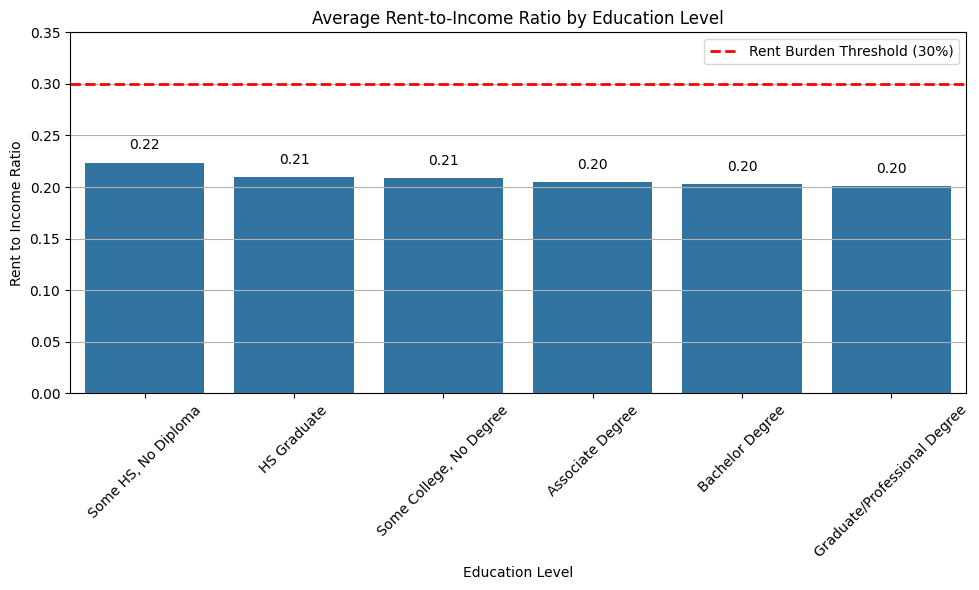

In [ ]:
education_groups = {
    'Some HS, No Diploma': 'some_hs_no_diploma_count',
    'HS Graduate': 'hs_grad_count',
    'Some College, No Degree': 'some_college_no_degree_count',
    'Associate Degree': 'associate_degree_count',
    'Bachelor Degree': 'bachelor_degree_count',
    'Graduate/Professional Degree': 'grad_prof_degree_count'
}

df_edu = compute_group_rent_income_ratio(con, 'goal3_df', education_groups, 'Education Level')
plot_rent_income_ratios(df_edu, 'Education Level', 'Average Rent-to-Income Ratio by Education Level')

### 3.2.3 Employment Status

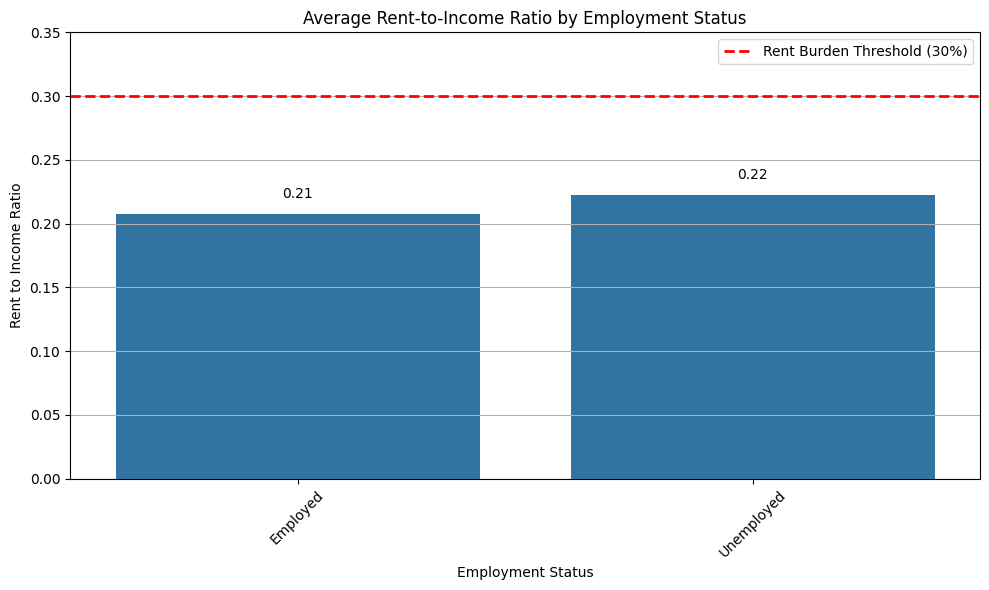

In [ ]:
employment_status_groups = {
    'Employed': 'employed_count',
    'Unemployed': 'unemployed_count'
}

df_emp = compute_group_rent_income_ratio(con, 'goal3_df', employment_status_groups, 'Employment Status')
plot_rent_income_ratios(df_emp, 'Employment Status', 'Average Rent-to-Income Ratio by Employment Status')

### 3.2.4 Nativity

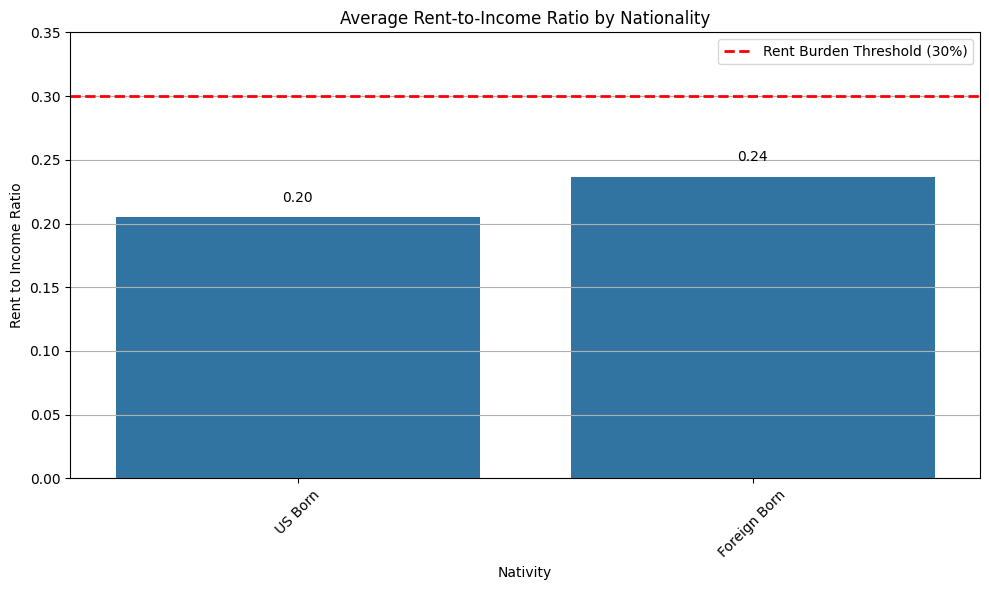

In [ ]:
nativity_groups = {
    'US Born': 'us_born_count',
    'Foreign Born': 'foreign_born_count'
}

df_nat = compute_group_rent_income_ratio(con, 'goal3_df', nativity_groups, 'Nativity')
plot_rent_income_ratios(df_nat, 'Nativity', 'Average Rent-to-Income Ratio by Nationality')

### 3.2.5 Language

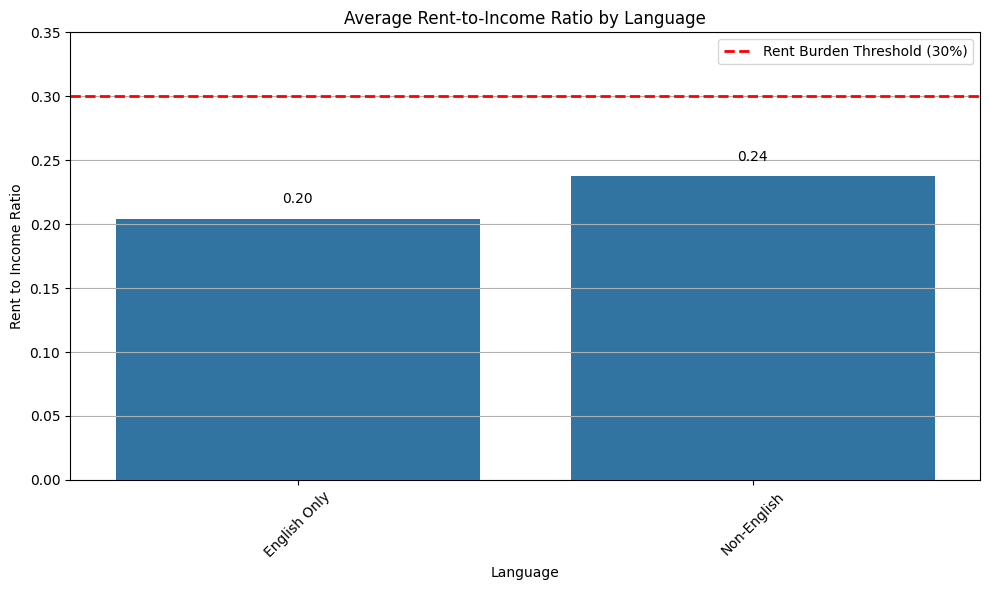

In [ ]:
language_groups = {
    'English Only': 'english_only_count',
    'Non-English': 'non_english_count'
}

df_lang = compute_group_rent_income_ratio(con, 'goal3_df', language_groups, 'Language')
plot_rent_income_ratios(df_lang, 'Language', 'Average Rent-to-Income Ratio by Language')

### 3.2.6 Disability Status

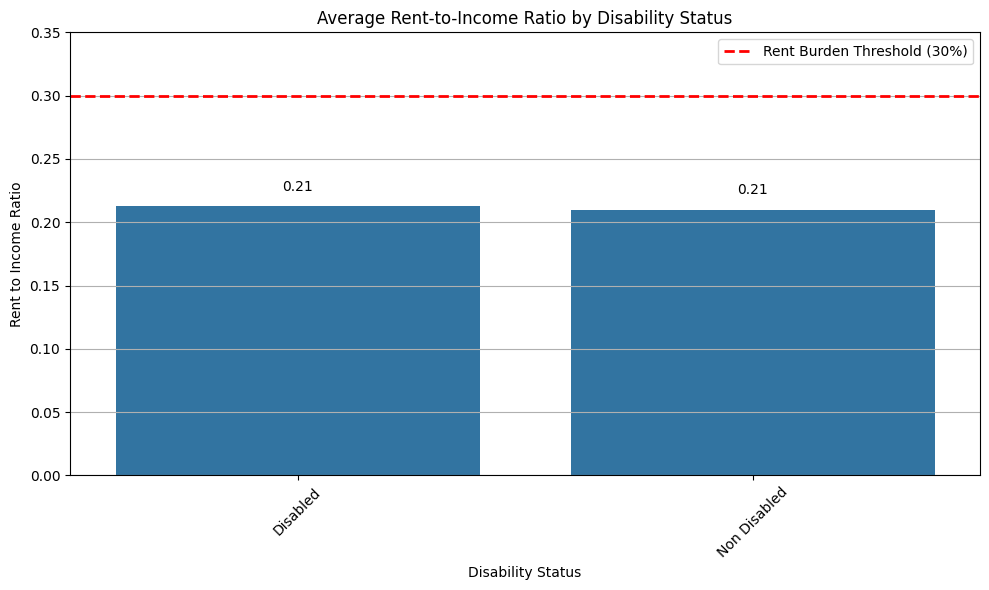

In [ ]:
# Estimated number of non-disabled for each row, while ensuring no negative values result from the subtraction
goal3_df['non_disabled_count'] = (goal3_df['population_count'] - goal3_df['disabled_pop_count']).clip(lower=0)

disability_status_groups = {
    'Disabled': 'disabled_pop_count',
    'Non Disabled': 'non_disabled_count',
}

df_disability = compute_group_rent_income_ratio(con, 'goal3_df', disability_status_groups, 'Disability Status')
plot_rent_income_ratios(df_disability, 'Disability Status', 'Average Rent-to-Income Ratio by Disability Status')

### 3.2.7 Veteran Status

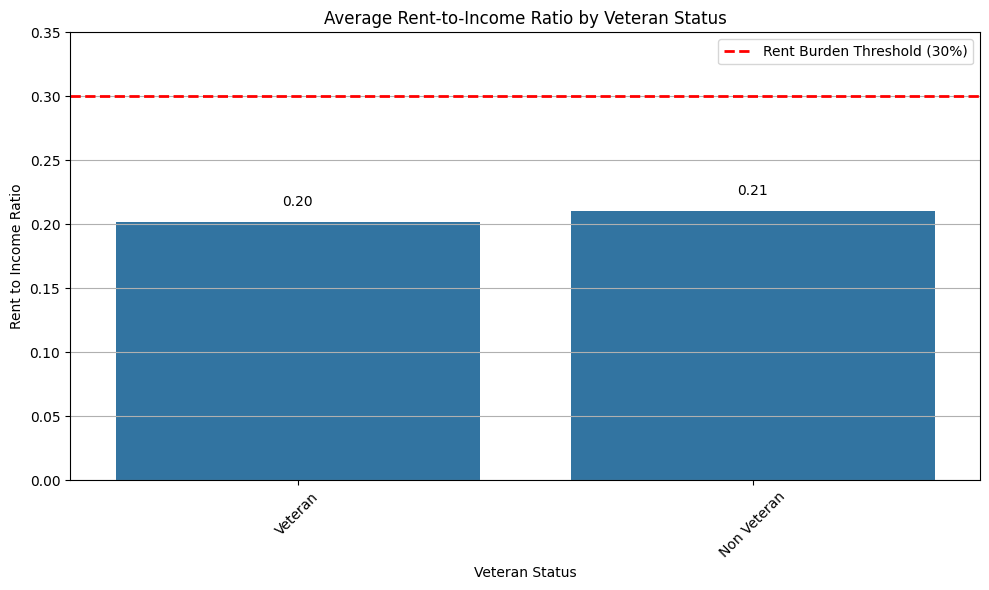

In [ ]:
# Estimated number of non-veterans for each row, while ensuring no negative values result from the subtraction
goal3_df['non_veterans_count'] = (goal3_df['population_count'] - goal3_df['veterans_count']).clip(lower=0)

veteran_status_groups = {
    'Veteran': 'veterans_count',
    'Non Veteran': 'non_veterans_count',
}

df_veteran = compute_group_rent_income_ratio(con, 'goal3_df', veteran_status_groups, 'Veteran Status')
plot_rent_income_ratios(df_veteran, 'Veteran Status', 'Average Rent-to-Income Ratio by Veteran Status')

## 3.3 Cross-tabulation Demographics with Income

### 3.3.0 Helper Functions

In [ ]:
def compute_rent_burden_by_income_and_demographic(con, df_name, demo_col, group_label='Group', burden_threshold=0.3):
    query = f"""
    WITH base AS (
        SELECT
            CASE
                WHEN median_income_dollars < 10000 THEN 'Under $10k'
                WHEN median_income_dollars BETWEEN 10000 AND 19999 THEN '$10k–$19k'
                WHEN median_income_dollars BETWEEN 20000 AND 29999 THEN '$20k–$29k'
                WHEN median_income_dollars BETWEEN 30000 AND 39999 THEN '$30k–$39k'
                WHEN median_income_dollars BETWEEN 40000 AND 49999 THEN '$40k–$49k'
                WHEN median_income_dollars BETWEEN 50000 AND 59999 THEN '$50k–$59k'
                WHEN median_income_dollars BETWEEN 60000 AND 69999 THEN '$60k–$69k'
                WHEN median_income_dollars BETWEEN 70000 AND 79999 THEN '$70k–$79k'
                WHEN median_income_dollars BETWEEN 80000 AND 89999 THEN '$80k–$89k'
                WHEN median_income_dollars BETWEEN 90000 AND 99999 THEN '$90k–$99k'
                WHEN median_income_dollars BETWEEN 100000 AND 149999 THEN '$100k–$149k'
                ELSE '$150k and Over'
            END AS income_bracket,
            median_rent_dollars * 12.0 / NULLIF(median_income_dollars, 0) AS rent_income_ratio,
            {demo_col} AS pop_count
        FROM {df_name}
        WHERE median_rent_dollars IS NOT NULL
          AND median_income_dollars IS NOT NULL
          AND median_income_dollars > 0
          AND {demo_col} IS NOT NULL
    )
    SELECT
        income_bracket,
        SUM(pop_count) AS total_pop,
        SUM(CASE WHEN rent_income_ratio > {burden_threshold} THEN pop_count ELSE 0 END) AS burdened_pop,
        1.0 * SUM(CASE WHEN rent_income_ratio > {burden_threshold} THEN pop_count ELSE 0 END) / SUM(pop_count) AS percent_burdened
    FROM base
    GROUP BY income_bracket
    ORDER BY
      CASE income_bracket
          WHEN 'Under $10k' THEN 1
          WHEN '$10k–$19k' THEN 2
          WHEN '$20k–$29k' THEN 3
          WHEN '$30k–$39k' THEN 4
          WHEN '$40k–$49k' THEN 5
          WHEN '$50k–$59k' THEN 6
          WHEN '$60k–$69k' THEN 7
          WHEN '$70k–$79k' THEN 8
          WHEN '$80k–$89k' THEN 9
          WHEN '$90k–$99k' THEN 10
          WHEN '$100k–$149k' THEN 11
          ELSE 12
      END
    """
    df = con.sql(query).df()
    df[group_label] = demo_col
    return df

### 3.3.1 Income bracket × Demographics

In [ ]:
group_cols = {
    'Some HS, No Diploma': 'some_hs_no_diploma_count',
    'HS Graduate': 'hs_grad_count',
    'Some College, No Degree': 'some_college_no_degree_count',
    'Associate Degree': 'associate_degree_count',
    'Bachelor Degree': 'bachelor_degree_count',
    'Graduate/Professional Degree': 'grad_prof_degree_count',

    'Employed': 'employed_count',
    'Unemployed': 'unemployed_count',

    'US-born': 'us_born_count',
    'Foreign-born': 'foreign_born_count',

    'English Only': 'english_only_count',
    'Non-English Speakers': 'non_english_count',

    'Disabled': 'disabled_pop_count',
    'Non-Disabled': 'non_disabled_count',

    'Veterans': 'veterans_count',
    'Non-Veteran': 'non_veterans_count',
}

income_order = [
    'Under $10k',
    '$10k–$19k',
    '$20k–$29k',
    '$30k–$39k',
    '$40k–$49k',
    '$50k–$59k',
    '$60k–$69k',
    '$70k–$79k',
    '$80k–$89k',
    '$90k–$99k',
    '$100k–$149k',
    '$150k and Over'
]

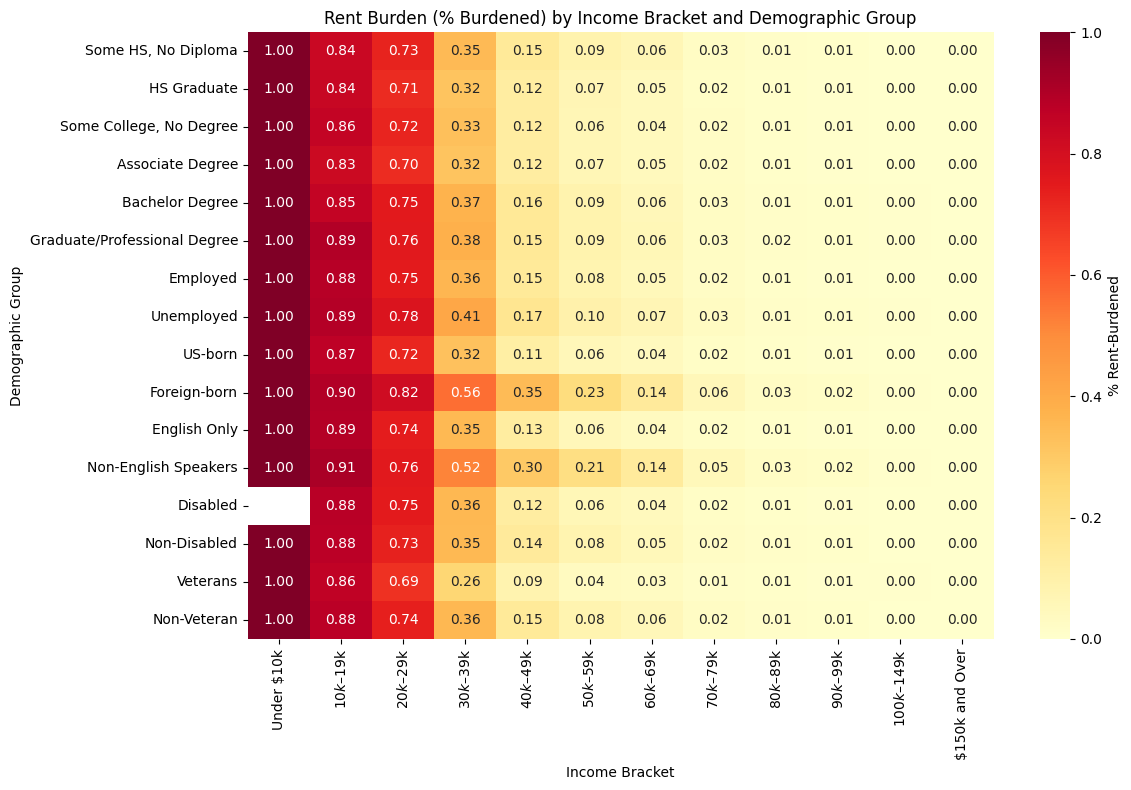

In [ ]:
results_heatmap = []

for label, col in group_cols.items():
    df = compute_rent_burden_by_income_and_demographic(con, 'goal3_df', col, 'Group')
    df['Group'] = label
    results_heatmap.append(df)

df_heatmap = pd.concat(results_heatmap, ignore_index=True)

# Pivot the data
heatmap_data = df_heatmap.pivot(index='Group', columns='income_bracket', values='percent_burdened')

# Reorder columns according to income_order
heatmap_data = heatmap_data[income_order]

# Reorder rows (groups) to match the group_cols definition order
group_order = list(group_cols.keys())
heatmap_data = heatmap_data.loc[group_order]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    cbar_kws={'label': '% Rent-Burdened'}
)
plt.title('Rent Burden (% Burdened) by Income Bracket and Demographic Group')
plt.ylabel('Demographic Group')
plt.xlabel('Income Bracket')
plt.tight_layout()
plt.show()